# ML for Fusion Peptide 

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import dweibull
from propy import PyPro
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
random.seed(4)

## Data Preprocessing

In [3]:

positive_seqs = pd.read_csv("/root/ProteinFeatureEngineering/data/positive.csv")['sequence'].to_list()
positive_seqs = [seq.replace('(','').replace(')','') for seq in positive_seqs if type(seq) is str]

positive_seqs = [seq for seq in positive_seqs if len(seq)>5]
positive_seqs = list(set(positive_seqs))
positive_seqs = positive_seqs*10
print("pos len:", len(positive_seqs))

pos len: 2220


In [4]:
def distribution(data):
    plt.figure(figsize=(3,2))
    sns.distplot(data)
    plt.legend()
    plt.grid(linestyle='--')
    plt.show()
    print(f"mean:{np.mean(data)}")
    print(f"var: {np.var(data)}")

/tmp/ipykernel_79053/776858533.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


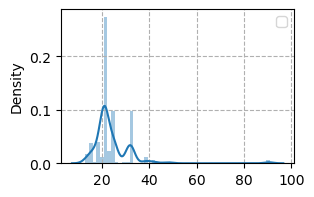

mean:24.166666666666668
var: 75.28303303303302


In [5]:
plt.style.use('default')

# make data
y = [len(seq) for seq in positive_seqs if type(seq) is str]
# print(y)
distribution(y)


[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.503779] [loc=24.167 scale=8.677]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.524751] [loc=13.000 scale=11.167]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.524751] [loc=-536870899.000 scale=536870912.000]
[distfit] >INFO> [dweibull  ] [0.06 sec] [RSS: 0.444858] [loc=21.000 scale=5.630]
[distfit] >INFO> [t         ] [0.20 sec] [RSS: 0.571997] [loc=21.000 scale=0.000]
[distfit] >INFO> [genextreme] [0.15 sec] [RSS: 0.480808] [loc=20.803 scale=4.590]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 0.487629] [loc=12.223 scale=3.979]
[distfit] >INFO> [lognorm   ] [0.07 sec] [RSS: 0.483564] [loc=9.878 scale=12.738]
[distfit] >INFO> [beta      ] [0.12 sec] [RSS: 0.488117] [loc=12.291 scale=542689881297.752]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.556306] [loc=13.000 scale=78.000]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.505644] [loc=-2019.149 scale=293.932]
[distfit] >INFO>

{'name': 'dweibull',
 'score': 0.4448581310440569,
 'loc': 21.000000000000007,
 'scale': 5.629956849096288,
 'arg': (0.8909754237264935,),
 'params': (0.8909754237264935, 21.000000000000007, 5.629956849096288),
 'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fe0d38fec10>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': 6.643670170217813,
 'CII_max_alpha': 35.3563298297822}

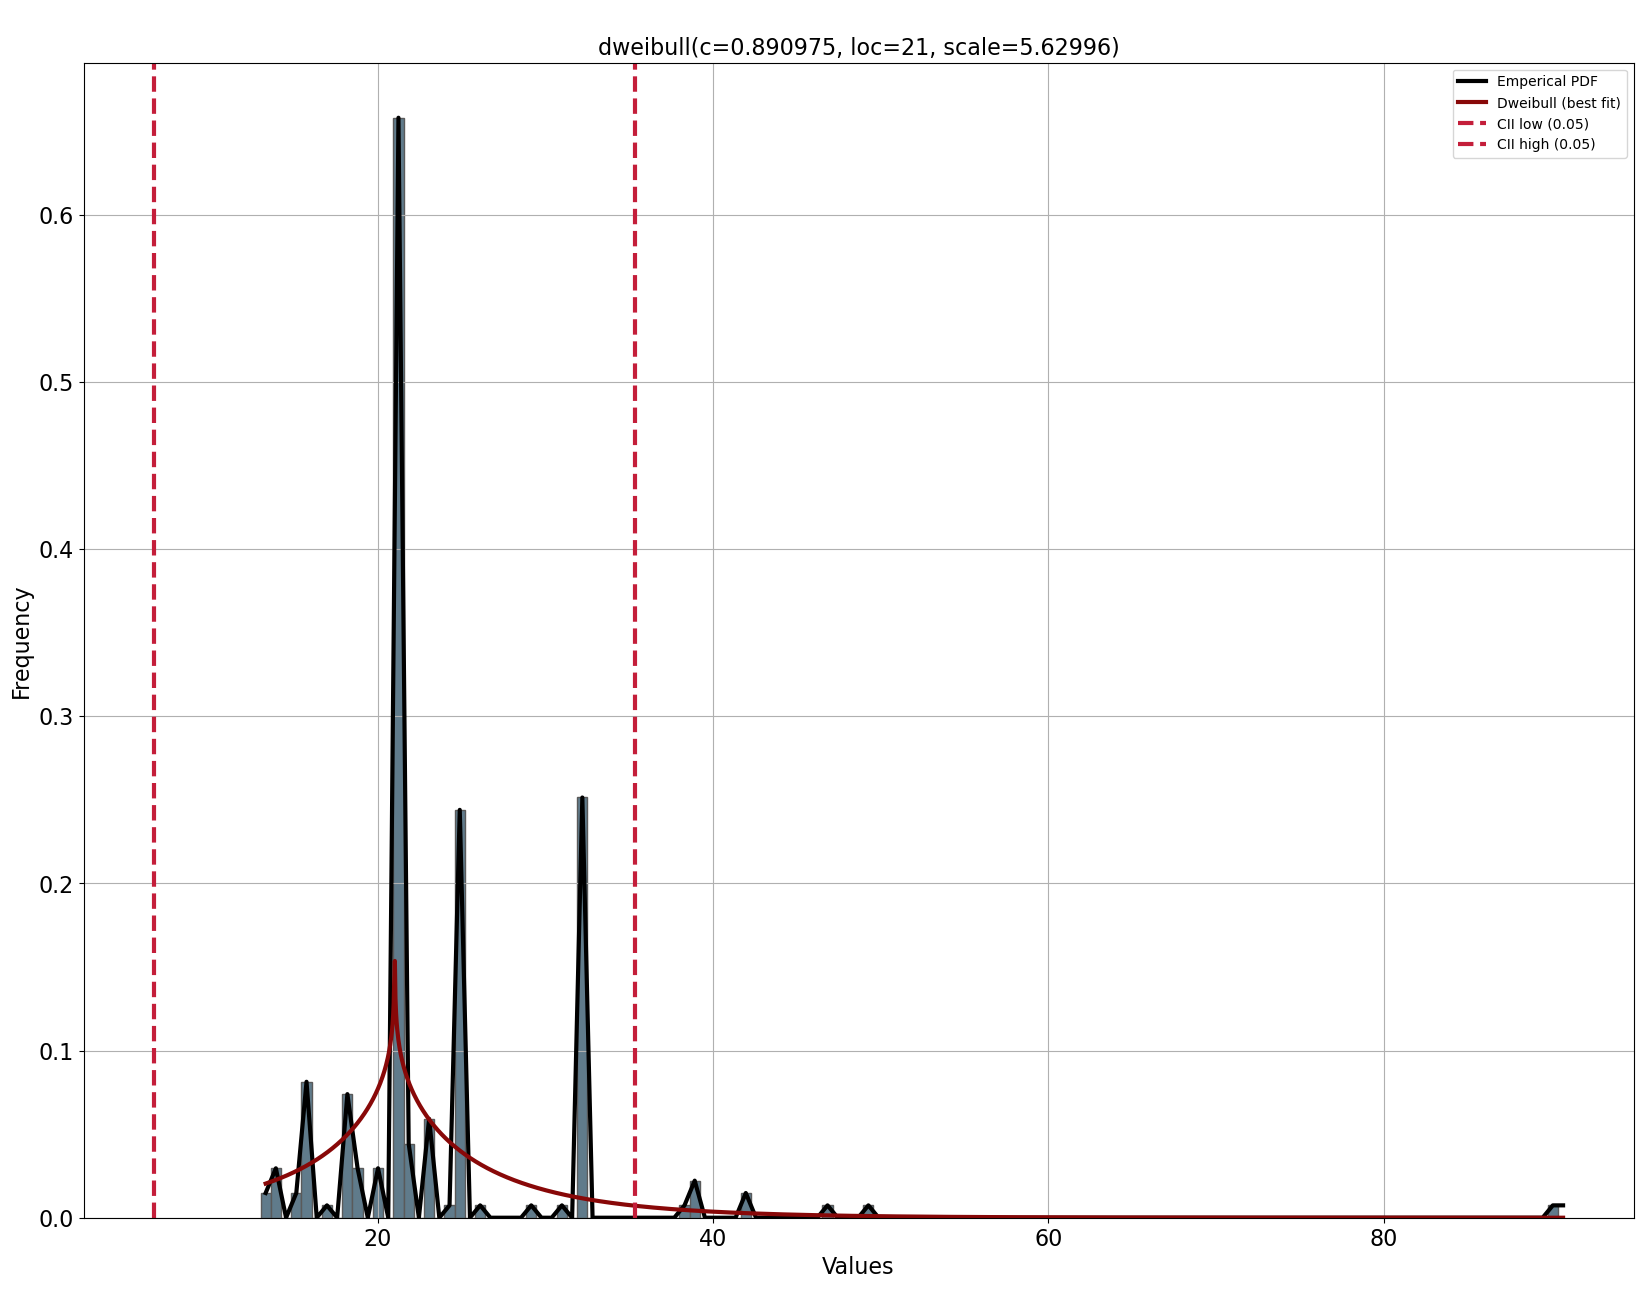

In [6]:
from distfit import distfit
import numpy as np
# X = np.random.normal(0, 2, [100,10])
dist = distfit(todf=True)
dist.fit_transform(np.array(y))
dist.plot()
dist.model

In [7]:
c, loc, scale = (0.5735579184883346, 20.999999999999996, 5.919494566655677)
r = dweibull.rvs(c, loc=loc, scale=scale)
r

24.270676229498296

In [8]:
with open("/root/ESM2-data/data/validation-0.fasta") as fp:
    str = fp.read()
    negative_seqs = str.split("\n")[1:301:3]

In [9]:
len(negative_seqs)

100

In [10]:
negative_seqs[:5]

['MPHYVVVKSPMRRRRSPRRRSPRVCYSPRRVACSPRRRSPRRRSPRRRSPRRSIVVY',
 'MTDKMGTDLTSFRGNLNGLYEAIKVQTALQKEAKTIKREQKKIKDEIDTFKTAILEDLKQRDQEGVEFKGLKITIHPKPKRVYFKKADKERLICEALRNCGIEDAQSKTKNVIDAISQIHTETEDTLKIIDSKKEKKVNKY',
 'MSGDCIASLKMVESQPLNSKEVEYVEKLLDPFDPVDTVERFTHNPNDPISVPIDPALIWSRKAIMRLIGLVVVLIINFPKVRDKINLNPYLVWVITTLILMGVFY',
 'MDLPVNLTSFSLSTPSPLETNHSLGKDDLRPSSPLLSVFGVLILTLLGFLVAATFAWNLLVLATILRVRTFHRVPHNLVASMAVSDVLVAALVMPLSLVHELSGRRWQLGRRLCQLWIACDVLCCTASIWNVTAIALDRYWSITRHMEYTLRTRKCVSNVMIALTWALSAVISLAPLLFGWGETYSEGSEECQVSREPSYAVFSTVGAFYLPLCVVLFVYWKIYKAAKFRVGSRKTNSVSPISEAVEVKDSAKQPQMVFTVRHATVTFQPEGDTWREQKEQRAALMVGILIGVFVLCWIPFFLTELISPLCSCDIPAIWKSIFLWLGYSNSFFNPLIYTAFNKNYNSAFKNFFSRQH',
 'MPSKEFIIPLILLCFYSVNGFVAVISSLVELFIHKASWNSIKIFFYSLLILQCLCRCIIIGWGMIETVQGGEFYSNFPSLLFISYAGLVALQMIQFLPNDNQYLLLSEGKKNNHKVKVGTNILIFFNLFMYFGMFLLFGIAEKQVGNSTSFNHHGNHNSTTSTSTDEIPLVSTEVGELYLFGDKDPIYIVLDCFYFVCLLLLLIFHSYVGWKTYKRNKDLFGIKLNVIHLILLICIFIRSLLVIIDPSSPNNSILHIDTESWLIYIYTISYYVVGEIIPGMLLIVIEFLLPYHKRKDFINIGGELSSYQDVWKSENIA

In [11]:
def cut(long, gap=20):
    short = []
    for seq in long:
        pos = 0
        seq_len = len(seq)
        while pos < seq_len:
            new_len = int(dweibull.rvs(c, loc=loc, scale=scale))
            while new_len <=0:
                new_len = int(dweibull.rvs(c, loc=loc, scale=scale))
            if new_len > seq_len - pos:
                new_len = seq_len - pos
            short.append(seq[pos:pos+new_len])
            pos += gap
    return short

In [12]:
negative_seqs = cut(negative_seqs)

negative_seqs = [seq for seq in negative_seqs if len(seq)>10]

print("neg len:", len(negative_seqs))

neg len: 2019


## Descriptor generation

In [13]:
def generate_feature(sequence):
    DesObject = PyPro.GetProDes(sequence)  # construct a GetProDes object
    feature_value = []
    feature_value = list(DesObject.GetAAComp().values()) # AAC
    feature_value += list(DesObject.GetDPComp().values()) # DPC
    feature_value += list(DesObject.GetTPComp().values()) # TPC
    feature_value += list(DesObject.GetMoreauBrotoAuto().values()) # MBauto
    feature_value += list(DesObject.GetMoranAuto().values())  # Moranauto
    feature_value += list(DesObject.GetGearyAuto().values()) # Gearyauto
    feature_value += list(DesObject.GetCTD().values()) # CTD
    feature_value += list(DesObject.GetSOCN().values()) # SOCN
    feature_value += list(DesObject.GetQSO().values()) # QSO
    feature_value += list(DesObject.GetPAAC(lamda=0).values()) # PAAC
    feature_value += list(DesObject.GetAPAAC().values()) # APAAC
    
    return feature_value

In [14]:
feature_list = []
DesObject = PyPro.GetProDes(positive_seqs[0]) 
feature_list += DesObject.GetAAComp().keys() # AAC
feature_list += DesObject.GetDPComp().keys() # DPC
feature_list += DesObject.GetTPComp().keys() # TPC
feature_list += DesObject.GetMoreauBrotoAuto().keys() # MBauto
feature_list += DesObject.GetMoranAuto().keys()  # Moranauto
feature_list += DesObject.GetGearyAuto().keys() # Gearyauto
feature_list += DesObject.GetCTD().keys() # CTD
feature_list += DesObject.GetSOCN().keys() # SOCN
feature_list += DesObject.GetQSO().keys() # QSO
feature_list += DesObject.GetPAAC().keys() # PAAC
feature_list += DesObject.GetAPAAC().keys() # APAAC

In [15]:
DesObject.GetSOCN().keys()

dict_keys(['tausw1', 'tausw2', 'tausw3', 'tausw4', 'tausw5', 'tausw6', 'tausw7', 'tausw8', 'tausw9', 'tausw10', 'tausw11', 'tausw12', 'tausw13', 'tausw14', 'tausw15', 'tausw16', 'tausw17', 'tausw18', 'tausw19', 'tausw20', 'tausw21', 'tausw22', 'tausw23', 'tausw24', 'tausw25', 'tausw26', 'tausw27', 'tausw28', 'tausw29', 'tausw30', 'tausw31', 'tausw32', 'tausw33', 'tausw34', 'tausw35', 'tausw36', 'tausw37', 'tausw38', 'tausw39', 'tausw40', 'tausw41', 'tausw42', 'tausw43', 'tausw44', 'tausw45', 'taugrant1', 'taugrant2', 'taugrant3', 'taugrant4', 'taugrant5', 'taugrant6', 'taugrant7', 'taugrant8', 'taugrant9', 'taugrant10', 'taugrant11', 'taugrant12', 'taugrant13', 'taugrant14', 'taugrant15', 'taugrant16', 'taugrant17', 'taugrant18', 'taugrant19', 'taugrant20', 'taugrant21', 'taugrant22', 'taugrant23', 'taugrant24', 'taugrant25', 'taugrant26', 'taugrant27', 'taugrant28', 'taugrant29', 'taugrant30', 'taugrant31', 'taugrant32', 'taugrant33', 'taugrant34', 'taugrant35', 'taugrant36', 'taugran

In [16]:
DesObject.GetGearyAuto().keys()

dict_keys(['GearyAuto_Hydrophobicity1', 'GearyAuto_Hydrophobicity2', 'GearyAuto_Hydrophobicity3', 'GearyAuto_Hydrophobicity4', 'GearyAuto_Hydrophobicity5', 'GearyAuto_Hydrophobicity6', 'GearyAuto_Hydrophobicity7', 'GearyAuto_Hydrophobicity8', 'GearyAuto_Hydrophobicity9', 'GearyAuto_Hydrophobicity10', 'GearyAuto_Hydrophobicity11', 'GearyAuto_Hydrophobicity12', 'GearyAuto_Hydrophobicity13', 'GearyAuto_Hydrophobicity14', 'GearyAuto_Hydrophobicity15', 'GearyAuto_Hydrophobicity16', 'GearyAuto_Hydrophobicity17', 'GearyAuto_Hydrophobicity18', 'GearyAuto_Hydrophobicity19', 'GearyAuto_Hydrophobicity20', 'GearyAuto_Hydrophobicity21', 'GearyAuto_Hydrophobicity22', 'GearyAuto_Hydrophobicity23', 'GearyAuto_Hydrophobicity24', 'GearyAuto_Hydrophobicity25', 'GearyAuto_Hydrophobicity26', 'GearyAuto_Hydrophobicity27', 'GearyAuto_Hydrophobicity28', 'GearyAuto_Hydrophobicity29', 'GearyAuto_Hydrophobicity30', 'GearyAuto_AvFlexibility1', 'GearyAuto_AvFlexibility2', 'GearyAuto_AvFlexibility3', 'GearyAuto_AvF

In [17]:
X = []
y = [1]*len(positive_seqs)+[0]*len(negative_seqs)

for sequence in positive_seqs:
    feature_value = generate_feature(sequence)
    X.append(feature_value)  # calculate 147 CTD descriptors

for sequence in negative_seqs:
    feature_value = generate_feature(sequence)
    X.append(feature_value)  # calculate 147 CTD descriptors


## Filter descriptor by variance

In [18]:
var_thres = VarianceThreshold(threshold=0.2)
var_thres.fit(X)

VarianceThreshold(threshold=0.2)

In [19]:
X_varthresh = np.array(X)[:,var_thres.get_support(indices=True)]

In [20]:
feature_list = np.array(feature_list)[var_thres.get_support(indices=True)]

In [21]:
len(X[0])

9537

In [22]:
len(X_varthresh[0])

831

In [23]:
df = pd.DataFrame(X_varthresh, columns=feature_list)
zero_ratios = (df==0).mean(axis=0)

threshold=0.7

selected_fetures = zero_ratios[zero_ratios < threshold].index.tolist()

df_selected = df[selected_fetures]

In [24]:
df_selected.columns

Index(['A', 'R', 'N', 'D', 'E', 'Q', 'G', 'I', 'L', 'K',
       ...
       'APAAC21', 'APAAC22', 'APAAC23', 'APAAC24', 'APAAC25', 'APAAC26',
       'APAAC27', 'APAAC28', 'APAAC29', 'APAAC30'],
      dtype='object', length=395)

## Feature selection

In [25]:
X_zscored_varthresh = stats.zscore(X_varthresh)

In [26]:
estimator = SVC(kernel="linear")
# selector = RFE(estimator, n_features_to_select=12, step=1)

# clf = BaggingClassifier(estimator=selector, n_estimators=15).fit(X_zscored_varthresh, y)
# clf.predict
    

In [27]:
step = 100
rfecv = RFECV(estimator=estimator, step=step, cv=3, scoring='roc_auc')
rfecv.fit(X,y)

# 绘图展示选择特征数量与AUC值之间的关系
plt.figure()
plt.xlabel("n_features_to_select")
plt.ylabel("AUC Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
np.where(rfecv.support_ == True)

In [ ]:
feature_list = np.array(feature_list)[rfecv.support_]
feature_list

In [ ]:
X = np.array(X_zscored_varthresh)[:, rfecv.support_]

In [ ]:
len(X[0])

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 生成 5 行 10 列的随机数组
data = X

sns.set_style("white")
sns.boxplot(data=data)
# plt.xticks(range(len(feature_list)), feature_list, rotation=90)
plt.xlabel("Features")
plt.ylabel("Value")
plt.show()

## SVM classification

In [ ]:
regr = make_pipeline(StandardScaler(), SVC(kernel="linear"))
regr.fit(X[:-100], y[:-100])
print("score", regr.score(X[-100:], y[-100:]))

In [ ]:
pred = regr.predict(X[-100:])
proba = regr.predict_proba(X[-100:])

fpr, tpr, thresholds = roc_curve(y[-100:], proba[:,1])

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guessing')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
params = zip(feature_list, regr.named_steps['svc'].coef_[0])
params=sorted(params, reverse=True, key=lambda x:(x[1], x[0]))
pd.DataFrame(params).to_csv("params.txt", index=None, header=None)
params

In [ ]:
no_auto_index = [False]*4 + [True]*3 + [False] + [True]*4

In [ ]:
no_auto_X = np.array(X)[:, no_auto_index]

In [ ]:
regr = make_pipeline(StandardScaler(), SVC(kernel="linear"))
regr.fit(no_auto_X, y)
print("score", regr.score(no_auto_X, y))

## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_varthresh)

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='none', alpha=0.7, cmap=plt.cm.get_cmap('viridis', 2))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

In [1]:
import matplotlib.pyplot as plt

data = {
    '11': [0.88, 0.94],
    '12': [0.88, 0.94],
    '13': [0.9119718309859155, 0.96],
    '14': [0.9265190767781442, 0.98],
    '15': [0.9115023474178404, 0.96]
}

x_labels = ['ACC', 'AC']

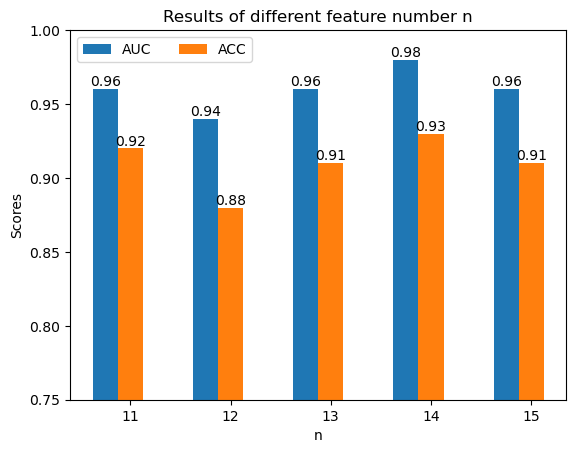

In [57]:
'''
Copyright (c) 2023 by Repr. Lab, Westlake University, All Rights Reserved. 
Author: Yuyang Zhou
Date: 2023-03-25 22:50:57
LastEditTime: 2023-04-29 10:54:38
'''
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("11", "12", "13", "14", "15")
penguin_means = {
    'AUC': (0.96, 0.94, 0.96, 0.98, 0.96),
    'ACC': (0.92, 0.88, 0.91, 0.93, 0.91),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

plt.style.use("default")
fig, ax = plt.subplots()

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_xlabel('n')
ax.set_title('Results of different feature number n')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0.75, 1.0)

plt.show()